#### Table of Contents

1. [Import data](#Import-data)
2. [Data exploration](#Data-exploration)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#### Import data

In [2]:
datab = pd.read_csv('train_B_text.csv')

In [3]:
datab

,Id,Title,Fake/Real
0,0,"""Humanitarian Aid: Volunteers Bring Relief to ...",fake
1,1,"Vegan, Low-Carbohydrate Eco-Atkins Diet could ...",real
2,2,"Fannie, Freddie Score Win Against Conn. Cities...",real
3,3,'Bachelorette' star Andi Dorfman quits job as ...,real
4,4,Deconstructing the FCC's Net Neutrality Ruling,real
...,...,...,...
3492,3492,WhatsApp CEO: Facebook will not affect privacy...,real
3493,3493,"""Marine Wonders: Coral Reefs Teeming with Exot...",fake
3494,3494,"""Space Exploration Milestone: Astronauts Embar...",fake
3495,3495,Teva Pharmaceutical Industries Ltd (ADR) Recei...,real


#### Data exploration

In [4]:
datab.loc[1]['Title']

'Vegan, Low-Carbohydrate Eco-Atkins Diet could Reduce Heart Disease Risk'

In [5]:
fake_titles = datab[datab['Fake/Real'] == 'fake']['Title'].to_list()

In [6]:
fake_titles[298]

'"Remembering Frankie Knuckles: A Tribute to the Iconic DJ"'

In [7]:
real_titles = datab[datab['Fake/Real'] == 'real']['Title'].to_list()

In [8]:
real_titles[100]

"UCLA Health System's Hospitals Ranked Among Nation's Best"

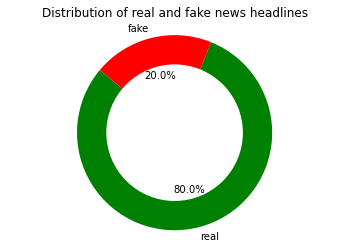

In [9]:
# Count the occurrences of each label
label_counts = datab['Fake/Real'].value_counts()

# Create a pie chart
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=['green', 'red'])

# Draw a circle at the center to make it look like a pie
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  

# Display the plot
plt.title('Distribution of real and fake news headlines')
plt.show()

Let's see if the length of the headline is somehow a good feature in order to classify them. Let's make some data exploration

In [10]:
datab.loc[1]['Title']

'Vegan, Low-Carbohydrate Eco-Atkins Diet could Reduce Heart Disease Risk'

We will need to erease all the starting ' " from the headlines to have plain strings

In [11]:
print(datab.loc[0]['Title'].strip('\"'))

Humanitarian Aid: Volunteers Bring Relief to Disaster-Hit Communities


In [12]:
datab['Title'] = datab['Title'].str.strip('\"')
datab['Title'] = datab['Title'].str.strip('\'')

In [13]:
datab.head()

,Id,Title,Fake/Real
0,0,Humanitarian Aid: Volunteers Bring Relief to D...,fake
1,1,"Vegan, Low-Carbohydrate Eco-Atkins Diet could ...",real
2,2,"Fannie, Freddie Score Win Against Conn. Cities...",real
3,3,Bachelorette' star Andi Dorfman quits job as a...,real
4,4,Deconstructing the FCC's Net Neutrality Ruling,real


We need to change column Fake/Real to boolean values 0 and 1 respectively.

In [14]:
datab['Fake/Real'] = datab['Fake/Real'].replace({'fake': 0, 'real': 1})
datab.rename(columns={'Fake/Real': 'real'}, inplace=True)

In [15]:
datab

,Id,Title,real
0,0,Humanitarian Aid: Volunteers Bring Relief to D...,0
1,1,"Vegan, Low-Carbohydrate Eco-Atkins Diet could ...",1
2,2,"Fannie, Freddie Score Win Against Conn. Cities...",1
3,3,Bachelorette' star Andi Dorfman quits job as a...,1
4,4,Deconstructing the FCC's Net Neutrality Ruling,1
...,...,...,...
3492,3492,WhatsApp CEO: Facebook will not affect privacy...,1
3493,3493,Marine Wonders: Coral Reefs Teeming with Exoti...,0
3494,3494,Space Exploration Milestone: Astronauts Embark...,0
3495,3495,Teva Pharmaceutical Industries Ltd (ADR) Recei...,1


#### Feature extraction
##### Tokenization
Take one string, for example the corresponding to the first entry, and tokenize it.

In [16]:
ex_str = datab.loc[0]['Title']
print(ex_str)

Humanitarian Aid: Volunteers Bring Relief to Disaster-Hit Communities


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=2, stop_words = 'english', strip_accents = 'unicode')
print ("Example: " + ex_str +"\n")
print ("Preprocessed: " + vectorizer.build_preprocessor()(ex_str)+"\n")
print ("Tokenized:" + str(vectorizer.build_tokenizer()(ex_str))+"\n")
print ("Analyzed data string:" + str(vectorizer.build_analyzer()(ex_str))+"\n")

Example: Humanitarian Aid: Volunteers Bring Relief to Disaster-Hit Communities

Preprocessed: humanitarian aid: volunteers bring relief to disaster-hit communities

Tokenized:['Humanitarian', 'Aid', 'Volunteers', 'Bring', 'Relief', 'to', 'Disaster', 'Hit', 'Communities']

Analyzed data string:['humanitarian', 'aid', 'volunteers', 'bring', 'relief', 'disaster', 'hit', 'communities']



In [18]:
# Tokenize the 'Title' column and store the result in a new column 'tokenized_title'
datab['tokenized_title'] = datab['Title'].apply(lambda x: ' '.join(vectorizer.build_analyzer()(x)))

In [19]:
datab

,Id,Title,real,tokenized_title
0,0,Humanitarian Aid: Volunteers Bring Relief to D...,0,humanitarian aid volunteers bring relief disas...
1,1,"Vegan, Low-Carbohydrate Eco-Atkins Diet could ...",1,vegan low carbohydrate eco atkins diet reduce ...
2,2,"Fannie, Freddie Score Win Against Conn. Cities...",1,fannie freddie score win conn cities tax row
3,3,Bachelorette' star Andi Dorfman quits job as a...,1,bachelorette star andi dorfman quits job assis...
4,4,Deconstructing the FCC's Net Neutrality Ruling,1,deconstructing fcc net neutrality ruling
...,...,...,...,...
3492,3492,WhatsApp CEO: Facebook will not affect privacy...,1,whatsapp ceo facebook affect privacy stance
3493,3493,Marine Wonders: Coral Reefs Teeming with Exoti...,0,marine wonders coral reefs teeming exotic unde...
3494,3494,Space Exploration Milestone: Astronauts Embark...,0,space exploration milestone astronauts embark ...
3495,3495,Teva Pharmaceutical Industries Ltd (ADR) Recei...,1,teva pharmaceutical industries adr receives co...


In [20]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix

bnb = BernoulliNB()
mnb = MultinomialNB()

X_train = vectorizer.fit_transform(datab['tokenized_title'])
Y_train = datab['real']

#first we will train the Bernoulli Naive Bayes classifier
bnb.fit(X_train, Y_train)
pred = bnb.predict(X_train)

print(metrics.classification_report(Y_train, pred))

              precision    recall  f1-score   support

           0       0.90      0.56      0.69       699
           1       0.90      0.98      0.94      2798

    accuracy                           0.90      3497
   macro avg       0.90      0.77      0.82      3497
weighted avg       0.90      0.90      0.89      3497



In [21]:
# now train the Multinomial Naive Bayes classifier
mnb.fit(X_train, Y_train)
pred = mnb.predict(X_train)

print(metrics.classification_report(Y_train, pred))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78       699
           1       0.94      0.96      0.95      2798

    accuracy                           0.92      3497
   macro avg       0.88      0.85      0.87      3497
weighted avg       0.92      0.92      0.92      3497



The multinomial Naive Bayes classifier performs a little bit better than the Bernoulli does.

<ipython-input-22-0395e555adbb>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels, size=20)
<ipython-input-22-0395e555adbb>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels, size=20)


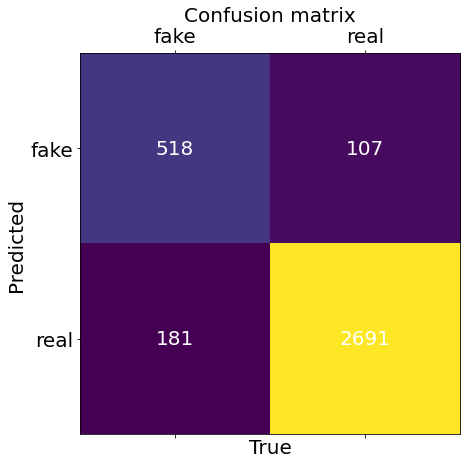

              precision    recall  f1-score   support

           0       0.83      0.74      0.78       699
           1       0.94      0.96      0.95      2798

    accuracy                           0.92      3497
   macro avg       0.88      0.85      0.87      3497
weighted avg       0.92      0.92      0.92      3497



In [22]:
#I take this from Oriol's pills to draw the confusion matrix
def draw_confusion(y, yhat, labels):
    cm = metrics.confusion_matrix(y, yhat)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(cm)
    plt.title('Confusion matrix',size=20)
    ax.set_xticklabels([''] + labels, size=20)
    ax.set_yticklabels([''] + labels, size=20)
    plt.ylabel('Predicted',size=20)
    plt.xlabel('True',size=20)
    for i in range(2):
        for j in range(2):
            ax.text(i, j, cm[i,j], va='center', ha='center',color='white',size=20)
    fig.set_size_inches(7,7)
    plt.show()
    
draw_confusion(Y_train, pred, ['fake', 'real'])
print (metrics.classification_report(Y_train,pred))

Can we make any other feature extraction to further improve this accuracy? Let us try TF-IDF.

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

headlines = ['Drinking vodka enhances creativity',
            'Nobody cares about television anymore',
            'It is too late to be working on this project']

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the headlines to obtain TF-IDF features
tfidf_matrix = tfidf_vectorizer.fit_transform(headlines)

# Get the feature names (words) and their corresponding TF-IDF values
feature_names = tfidf_vectorizer.get_feature_names()
tfidf_values = tfidf_matrix.toarray()

print(feature_names, '\n')
print(tfidf_values)

['about', 'anymore', 'be', 'cares', 'creativity', 'drinking', 'enhances', 'is', 'it', 'late', 'nobody', 'on', 'project', 'television', 'this', 'to', 'too', 'vodka', 'working'] 

[[0.         0.         0.         0.         0.5        0.5
  0.5        0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.5
  0.        ]
 [0.4472136  0.4472136  0.         0.4472136  0.         0.
  0.         0.         0.         0.         0.4472136  0.
  0.         0.4472136  0.         0.         0.         0.
  0.        ]
 [0.         0.         0.31622777 0.         0.         0.
  0.         0.31622777 0.31622777 0.31622777 0.         0.31622777
  0.31622777 0.         0.31622777 0.31622777 0.31622777 0.
  0.31622777]]


In [24]:
avg_tfidf_values = np.mean(tfidf_matrix, axis=1).flatten()
print(avg_tfidf_values)

[[0.10526316 0.11768779 0.16643567]]


Let us do it for the tokenized titles in the dataframe datab

In [25]:
headlines = datab['tokenized_title'].to_numpy()

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the headlines to obtain TF-IDF features
tfidf_matrix = tfidf_vectorizer.fit_transform(headlines)

# Sum TF-IDF values along the columns (axis=1) and use toarray() to get a dense matrix
sum_tfidf_values = np.sum(tfidf_matrix.toarray(), axis=1)

# Print the resulting array
print(sum_tfidf_values)

[2.82251078 3.13633019 2.8106086  ... 2.81899023 2.4432535  2.19945002]


In [26]:
datab['tf-idf_score'] = sum_tfidf_values

In [27]:
datab

,Id,Title,real,tokenized_title,tf-idf_score
0,0,Humanitarian Aid: Volunteers Bring Relief to D...,0,humanitarian aid volunteers bring relief disas...,2.822511
1,1,"Vegan, Low-Carbohydrate Eco-Atkins Diet could ...",1,vegan low carbohydrate eco atkins diet reduce ...,3.136330
2,2,"Fannie, Freddie Score Win Against Conn. Cities...",1,fannie freddie score win conn cities tax row,2.810609
3,3,Bachelorette' star Andi Dorfman quits job as a...,1,bachelorette star andi dorfman quits job assis...,3.263360
4,4,Deconstructing the FCC's Net Neutrality Ruling,1,deconstructing fcc net neutrality ruling,2.207722
...,...,...,...,...,...
3492,3492,WhatsApp CEO: Facebook will not affect privacy...,1,whatsapp ceo facebook affect privacy stance,2.414533
3493,3493,Marine Wonders: Coral Reefs Teeming with Exoti...,0,marine wonders coral reefs teeming exotic unde...,2.817860
3494,3494,Space Exploration Milestone: Astronauts Embark...,0,space exploration milestone astronauts embark ...,2.818990
3495,3495,Teva Pharmaceutical Industries Ltd (ADR) Recei...,1,teva pharmaceutical industries adr receives co...,2.443254


In [28]:
datab['combine_features'] = datab['tokenized_title'] + ' ' + datab['tf-idf_score'].astype(str)

In [29]:
datab

,Id,Title,real,tokenized_title,tf-idf_score,combine_features
0,0,Humanitarian Aid: Volunteers Bring Relief to D...,0,humanitarian aid volunteers bring relief disas...,2.822511,humanitarian aid volunteers bring relief disas...
1,1,"Vegan, Low-Carbohydrate Eco-Atkins Diet could ...",1,vegan low carbohydrate eco atkins diet reduce ...,3.136330,vegan low carbohydrate eco atkins diet reduce ...
2,2,"Fannie, Freddie Score Win Against Conn. Cities...",1,fannie freddie score win conn cities tax row,2.810609,fannie freddie score win conn cities tax row 2...
3,3,Bachelorette' star Andi Dorfman quits job as a...,1,bachelorette star andi dorfman quits job assis...,3.263360,bachelorette star andi dorfman quits job assis...
4,4,Deconstructing the FCC's Net Neutrality Ruling,1,deconstructing fcc net neutrality ruling,2.207722,deconstructing fcc net neutrality ruling 2.207...
...,...,...,...,...,...,...
3492,3492,WhatsApp CEO: Facebook will not affect privacy...,1,whatsapp ceo facebook affect privacy stance,2.414533,whatsapp ceo facebook affect privacy stance 2....
3493,3493,Marine Wonders: Coral Reefs Teeming with Exoti...,0,marine wonders coral reefs teeming exotic unde...,2.817860,marine wonders coral reefs teeming exotic unde...
3494,3494,Space Exploration Milestone: Astronauts Embark...,0,space exploration milestone astronauts embark ...,2.818990,space exploration milestone astronauts embark ...
3495,3495,Teva Pharmaceutical Industries Ltd (ADR) Recei...,1,teva pharmaceutical industries adr receives co...,2.443254,teva pharmaceutical industries adr receives co...


In [30]:
mnb = MultinomialNB()

X_train = vectorizer.fit_transform(datab['combine_features'])
Y_train = datab['real']


mnb.fit(X_train, Y_train)
pred = mnb.predict(X_train)

print(metrics.classification_report(Y_train, pred))

              precision    recall  f1-score   support

           0       0.84      0.74      0.78       699
           1       0.94      0.96      0.95      2798

    accuracy                           0.92      3497
   macro avg       0.89      0.85      0.87      3497
weighted avg       0.92      0.92      0.92      3497



Including the TF-IDF does not add any accuracy to the model. Maybe we could use sentiment analysis, since fake news tend to be not neutral.

In [34]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [35]:
nltk.download('vader_lexicon')

sentences = ['I am very happy!',
            'I am ill depressed',
            'I woke up at 8.00 am']

# Initialize the SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

for sentence in sentences:
    sentiment_scores = sid.polarity_scores(sentence)
    print(f"Sentence: {sentence}")
    print(f"Sentiment Scores: {sentiment_scores}")
    print("Sentiment:", end=" ")

    # Determine sentiment based on the compound score
    if sentiment_scores['compound'] >= 0.05:
        print("Positive")
    elif sentiment_scores['compound'] <= -0.05:
        print("Negative")
    else:
        print("Neutral")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\otgar\AppData\Roaming\nltk_data...


Sentence: I am very happy!
Sentiment Scores: {'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}
Sentiment: Positive
Sentence: I am ill depressed
Sentiment Scores: {'neg': 0.859, 'neu': 0.141, 'pos': 0.0, 'compound': -0.7269}
Sentiment: Negative
Sentence: I woke up at 8.00 am
Sentiment Scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment: Neutral


Let us try with a random headline

In [43]:
datab.loc[452]['Title']

'Botox maker Allergan draws bid from Valeant (Update)'

In [38]:
sentence = datab.loc[452]['Title']
sentiment_scores = sid.polarity_scores(sentence)
print(sentiment_scores)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [41]:
datab.loc[452].real

1

In [42]:
datab.loc[0]['Title']

'Humanitarian Aid: Volunteers Bring Relief to Disaster-Hit Communities'

In [44]:
sentence = datab.loc[0]['Title']
sentiment_scores = sid.polarity_scores(sentence)
print(sentiment_scores)

{'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'compound': 0.4767}


In [45]:
datab.loc[0].real

0

It looks like we could use the score of sentiment analysis to try to identify which of the titles are fake or real